<a href="https://colab.research.google.com/github/javierdealba/bd_equipo_23/blob/main/analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración inicial de los datos

En esta primera sección se importa el dataset a través de la biblioteca de hugginface.

## Instalaciones e importaciones

In [1]:
! pip install datasets
!pip install pyspark

In [2]:
import datasets
datasets.logging.set_verbosity_error()
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset_meta = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Video_Games", split="full", trust_remote_code=True)
dataset_review = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Video_Games", split="full", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Idea general del dataset.

Primero vemos los datasets, y observamos los features incluidos y el número de entradas. Se observan tanto el dataset de metadatos, como el de retroalimentaciones. En este caso se observan más datos en retroalimentaciones.

In [3]:
dataset_meta

Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 137269
})

In [4]:
dataset_review

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 4624615
})

Se convierte a Pandas para un manejo más sencillo de los datos, aunque la conversión puede tardar algo de tiempo.

In [5]:
import pandas as pd
from datetime import datetime

start = datetime.now()
df_meta = pd.DataFrame(dataset_meta)
end = datetime.now()
print(f"elapsed time: {end-start}")

start = datetime.now()
df_review = pd.DataFrame(dataset_review)
end = datetime.now()
print(f"elapsed time: {end-start}")

elapsed time: 0:00:54.221955
elapsed time: 0:09:30.333476


In [6]:
print(df_meta.dtypes)
df_meta.head()

main_category       object
title               object
average_rating     float64
rating_number        int64
features            object
description         object
price               object
images              object
videos              object
store               object
categories          object
details             object
parent_asin         object
bought_together     object
subtitle            object
author              object
dtype: object


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Video Games,Dash 8-300 Professional Add-On,5.0,1,[Features Dash 8-300 and 8-Q300 ('Q' rollout l...,[The Dash 8-300 Professional Add-On lets you p...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Aerosoft,"[Video Games, PC, Games]","{""Pricing"": ""The strikethrough price is the Li...",B000FH0MHO,None,None,None
1,Video Games,Phantasmagoria: A Puzzle of Flesh,4.1,18,[Windows 95],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Sierra,"[Video Games, PC, Games]","{""Best Sellers Rank"": {""Video Games"": 137612, ...",B00069EVOG,None,None,None
2,Video Games,NBA 2K17 - Early Tip Off Edition - PlayStation 4,4.3,223,[The #1 rated NBA video game simulation series...,[Following the record-breaking launch of NBA 2...,58.0,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['NBA 2K17 - Kobe: Haters vs Players...,2K,"[Video Games, PlayStation 4, Games]","{""Release date"": ""September 16, 2016"", ""Best S...",B00Z9TLVK0,None,None,None
3,Video Games,Nintendo Selects: The Legend of Zelda Ocarina ...,4.9,22,[Authentic Nintendo Selects: The Legend of Zel...,[],37.42,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Amazon Renewed,"[Video Games, Legacy Systems, Nintendo Systems...","{""Best Sellers Rank"": {""Video Games"": 51019, ""...",B07SZJZV88,None,None,None
4,Video Games,Thrustmaster Elite Fitness Pack for Nintendo Wii,3.0,3,"[Includes (9) Total Accessories, Pedometer, Wi...",[The Thrustmaster Motion Plus Elite Fitness Pa...,None,"{'hi_res': [None, None, None, None, None, None...","{'title': [], 'url': [], 'user_id': []}",THRUSTMASTER,"[Video Games, Legacy Systems, Nintendo Systems...","{""Release date"": ""November 1, 2009"", ""Pricing""...",B002WH4ZJG,None,None,None


In [7]:
print(df_review.dtypes)
df_review.head()

rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,It’s pretty sexual. Not my fav,I’m playing on ps5 and it’s interesting. It’s...,[],B07DJWBYKP,B07DK1H3H5,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1608186804795,0,True
1,5.0,Good. A bit slow,Nostalgic fun. A bit slow. I hope they don’t...,[],B00ZS80PC2,B07SRWRH5D,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1587051114941,1,False
2,5.0,... an order for my kids & they have really en...,This was an order for my kids & they have real...,[],B01FEHJYUU,B07MFMFW34,AGXVBIUFLFGMVLATYXHJYL4A5Q7Q,1490877431000,0,True
3,5.0,Great alt to pro controller,"These work great, They use batteries which is ...",[],B07GXJHRVK,B0BCHWZX95,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1577637634017,0,True
4,5.0,solid product,I would recommend to anyone looking to add jus...,[],B00HUWA45W,B00HUWA45W,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1427591932000,0,True


Al ver la estructura general de los datos y los tipos de datos, se deben eliminar columnas innecesarias para este análisis. En este análisis se seguirá trabajando con el dataframe de metadatos.

In [8]:
meta_drop = ["images","videos", "subtitle", "author"]
df_meta = df_meta.drop(meta_drop, axis=1)

review_drop = ["images"]
df_review = df_review.drop(review_drop, axis=1)

In [9]:
lists = df_meta["categories"].value_counts().index
unique_categories = set()

for l in lists:
  unique_categories.update(l)

unique_categories

{'2023 Most Anticipated',
 '3DO',
 'AMG PS Vita Test Node',
 'Accessories',
 'Accessories Week',
 'Accessory Kits',
 'Adapters',
 'Atari 2600',
 'Atari 5200',
 'Atari 7800',
 'Atari Jaguar',
 'Atari Lynx',
 'Atari Systems',
 'Batteries',
 'Batteries & Chargers',
 'Battery & Charger Sets',
 'Best Simulation/Strategy',
 'Bestselling in Renewed Video Games',
 'Bonus Offers - Up to $20 Credit',
 'Cables',
 'Cables & Adapters',
 'Cameras',
 'Cameras & Webcams',
 'Carleton',
 'Cases',
 'Cases & Storage',
 'Chargers',
 'ColecoVision',
 'Command & Conquer',
 'Command & Conquer Merchandise',
 'Commodore 64',
 'Commodore Amiga',
 'Commodore Systems',
 'Consoles',
 'Controllers',
 'Cooling Systems',
 'Dance Pads',
 'Deals on Nominations 12/18/2022-12/23/2022',
 'Digital Games - International',
 'Digital Video Games',
 'Digital for the Holidays',
 'Disney Interactive Studios',
 'Downloadable Content',
 'Drums',
 'EA Games',
 'Eligible Accessories for Digital Game Attach Promotion',
 'FREE One-Day 

Se crean nuevos features para separar en las principales compañias de videojuegos y observar sus ratings.

In [10]:
df_meta["category_xbox"] = df_meta["categories"].apply(lambda l: any("xbox" in i.lower() for i in l))
df_meta["category_playstation"] = df_meta["categories"].apply(lambda l: any("playstation" in i.lower() for i in l))
df_meta["category_nintendo"] = df_meta["categories"].apply(lambda l: any(
    ("nintendo" in i.lower() or "wii" in i.lower() or "game boy" in i.lower()) for i in l)
)

Average rating in X Box: 4.009208542713568


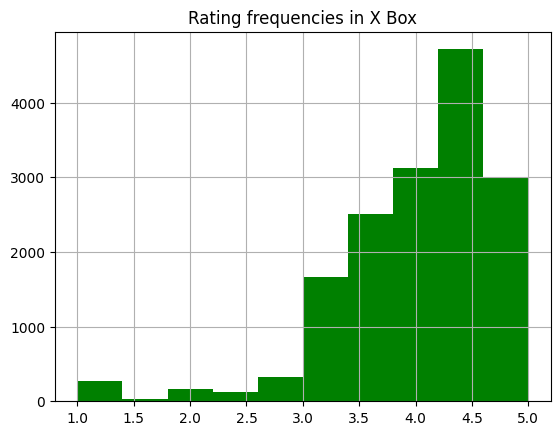

In [23]:
xbox_rows = df_meta[df_meta["category_xbox"]]

print(f'Average rating in X Box: {xbox_rows["average_rating"].mean()}')

xbox_rows["average_rating"].hist(color = "green")
plt.title("Rating frequencies in X Box")
plt.show()

Average rating in PlayStation: 4.048340963128571


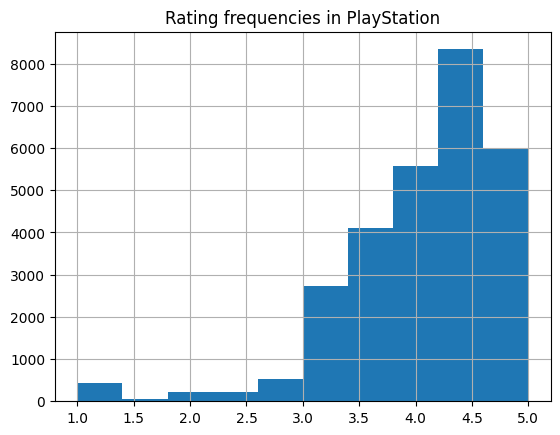

In [21]:
ps_rows = df_meta[df_meta["category_playstation"]]

print(f'Average rating in PlayStation: {ps_rows["average_rating"].mean()}')

ps_rows["average_rating"].hist()
plt.title("Rating frequencies in PlayStation")
plt.show()

Average rating in Nintendo: 4.1474883682055


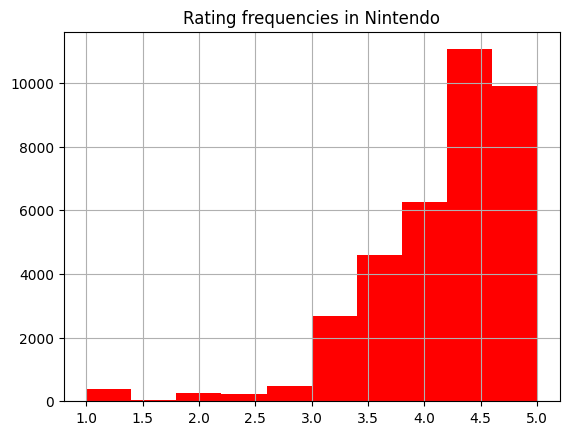

In [20]:
nintendo_rows = df_meta[df_meta["category_nintendo"]]

print(f'Average rating in Nintendo: {nintendo_rows["average_rating"].mean()}')

nintendo_rows["average_rating"].hist(color = "red")
plt.title("Rating frequencies in Nintendo")
plt.show()

Ahora utilizaremos el df de retroalimentaciones para sacar las estadísticas de compras.

In [24]:
verified_purchases = df_review[df_review["verified_purchase"]].reset_index(drop=True)
verified_purchases["timestamp"] = verified_purchases["timestamp"].apply(lambda l: datetime.fromtimestamp(l/1000).date())
verified_purchases

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,It’s pretty sexual. Not my fav,I’m playing on ps5 and it’s interesting. It’s...,B07DJWBYKP,B07DK1H3H5,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-12-17,0,True
1,5.0,... an order for my kids & they have really en...,This was an order for my kids & they have real...,B01FEHJYUU,B07MFMFW34,AGXVBIUFLFGMVLATYXHJYL4A5Q7Q,2017-03-30,0,True
2,5.0,Great alt to pro controller,"These work great, They use batteries which is ...",B07GXJHRVK,B0BCHWZX95,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,2019-12-29,0,True
3,5.0,solid product,I would recommend to anyone looking to add jus...,B00HUWA45W,B00HUWA45W,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,2015-03-29,0,True
4,3.0,love all the amazing colors but the black is r...,love all the amazing colors but the black is r...,B016Y2BVKA,B073SC6V1D,AHXSBZT52TCPZUBVCBRICTHWUCBA,2018-02-08,0,True
...,...,...,...,...,...,...,...,...,...
3982802,5.0,You Need This Mouse,This mouse is awesome! It's very light in the ...,B07GCKQD77,B0C89J78ZW,AEGJO3XG3JGBVIJW64SDJ6BIYWHQ,2023-09-10,0,True
3982803,5.0,Great product for the price,nothing!,B089F1BD4W,B089F1BD4W,AHTYCU6NSHJ4BY7R2YNDIDGUXS6Q,2020-09-23,0,True
3982804,5.0,Great budget headset.,My daughter loves the headset for playing Fort...,B01H6GUCCQ,B0BN942894,AF4KDWDGCJSUEB7JESQZ6ZWD2LNA,2020-03-22,0,True
3982805,1.0,Does not fit controler,Literally doesn’t freaking fit.,B09SM83KRP,B09SM83KRP,AG3BHCQJCY3MPNP3UKVAENSGQM2A,2022-10-25,1,True


In [32]:
print(f'Total customers: {verified_purchases["user_id"].nunique()}')

customer_purchases = verified_purchases.groupby("user_id")["asin"].unique()
customer_purchases = customer_purchases.to_frame()
customer_purchases["total_purchases"] = customer_purchases["asin"].apply(len).sort_values(ascending=False)

Total customers: 2507761


In [34]:
customer_purchases.sort_values("total_purchases", ascending=False).head(20)

,asin,total_purchases
user_id,,
AHY7NSZXW4IUPQ2E4BPUOXUVP3UQ,"[B0BL5XBFHJ, B0BF62NXC4, B0B4PWH9DP, B0BPGCX3B...",288
AFVOW2EKNL5O25KG6VA4AIZKSB2A,"[B0BBSQP38S, B09ZYSL84S, B09MCK3DSL, B09DN32PR...",233
AGWMT2QORZIH3ITWUO5CRPK2OH5A,"[B01HQGWBZ2, B071G5HZ7F, B078Y4FR14, B071WPKD5...",218
AGUTKSIA7TDKIDLDEGUOY2ZITO6Q,"[B000N0WBMM, B00009YEKE, B00004TEXS, B000HG9NF...",197
AEAJGVYGMLBO7LRYA2YRVLNT6KSQ,"[B09VS12V7G, B06X9ZSSRK, B094KD3YQS, B096MPF46...",195
AGGCYRHJAX5O2KP27Z6X2FZQ35SQ,"[B0136JPKIS, B08VJQBSY3, B086G788Y2, B072MR3V1...",172
AH27K6RCVKRAXSMEQKCK4YB4VAKQ,"[B08ZKVZ6CR, B08YSY9PSH, B08ZKT36DS, B07SMBNTS...",161
AEHS4HKXSG3K7FKSZYYMHD4WMKGA,"[B003E6VK7Y, B00TDM91CY, B002ST7AEU, B0041CWZE...",157
AGQZ3AM5KQFJCOFEP5RXMOTN5CBQ,"[B07V3BR3GB, B08CKR6M86, B093D8YX6V, B08BYJGVB...",154


In [27]:
print("Compras promedio por cada cliente:")
customer_purchases["total_purchases"].mean()

Compras promedio por cada cliente:


1.569773993614224

In [28]:
user_purchases = verified_purchases.groupby(['user_id', 'timestamp']).size().reset_index(name='count')
multiple_user_purchases = user_purchases[user_purchases['count'] > 1]

In [29]:
multiple_user_purchases

,user_id,timestamp,count
21,AE222T2BWBACWZJFX62EIFSY67YA,2018-04-04,2
23,AE222TIYCUU6T4DZZZB6I4LE6ZVQ,2013-10-17,2
46,AE223HSYBHVEG3XV2SRRXWFHM5KQ,2013-05-07,3
58,AE223SBXB2PFTMOITN4V53TLSFSA,2016-06-22,2
62,AE223ZMLET5PBTOOD5JOLLNP3TFQ,2021-04-14,2
...,...,...,...
3341297,AHZZYR74YSTBTJMWGZFMU5B6HWZA,2019-03-14,2
3341299,AHZZYR74YSTBTJMWGZFMU5B6HWZA,2019-08-10,3
3341307,AHZZZBOM3X5DXCWGJ27I2JEREBPA,2015-01-02,3
3341322,AHZZZY2XVWEUJUTYPGGL4WXH6CSA,2016-05-23,2


## Conclusión

En conclusión, el análisis exploratorio inicial de los datos permitió identificar las principales propiedades de los conjuntos de datos, tanto de las retroalimentaciones de usuarios como de los metadatos de cada elemento en venta. Se observaron las calificaciones en los reviews y sus distribuciones dentro del mismo grupo de videojuegos de las principales empresas, como Xbox, Nintendo y PlayStation. Este hallazgo es relevante, ya que los consumidores tienden a continuar comprando juegos y accesorios para la misma consola y los productos con mejores calificaciones muestran una mayor tendencia a ser vendidos. Además, se detectó una tendencia general hacia calificaciones positivas. Asimismo, se logró agrupar las compras realizadas por el mismo usuario en un mismo día, lo que permite verificar qué elementos tienden a comprarse juntos. Por último, se visualizó la cantidad promedio de compras realizadas por cada cliente, aunque este dato puede estar ligeramente sesgado debido a que solo se consideraron las compras que recibieron retroalimentación.